In [1]:
from os import path
import matplotlib.pyplot as plt
import glob
import numpy as np
from sklearn import metrics
import pandas as pd
from matplotlib.pyplot import savefig
from sklearn.metrics import roc_auc_score

In [2]:
def plot_roc_curve(data_fn):
    plot_title = data_fn.replace('.data','').replace('with_respeaking','+ respeaking').replace('without_respeaking','+ original').replace('kunwok_result/','').replace('_',' ').replace('out','').replace('topic','30 topic')
    x = pd.read_pickle(data_fn)
    y = np.array((len(x['match_dtw'])*[1])+(len(x['nomatch_dtw'])*[0]))
    match_score = map(lambda x: 1-x, x['match_dtw'])
    nomatch_score = map(lambda x: 1-x, x['nomatch_dtw'])
    scores = np.array(list(match_score)+list(nomatch_score))
    tpr, fpr, thresholds = metrics.roc_curve(y, scores)
    auc = roc_auc_score(y, scores)
    print(plot_title)
    print('ROC-AUC: %.5f' % (auc))
    plt.plot(tpr, fpr, label=plot_title+', AUC:%.2f' % auc)

kunwok common words with original
ROC-AUC: 0.62600
kunwok common words + respeaking
ROC-AUC: 0.62494


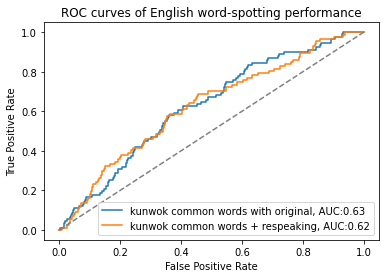

In [3]:
title = 'title'
for data_fn in sorted(glob.glob(path.join('kunwok_result','kunwok_common*'))):
    plot_roc_curve(data_fn)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Kunwinjku Word-Spotting with 60 Common Words') 
plt.legend()
plt.savefig(title, dpi=400)
plt.show()